In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

GENERATE_PNGS = False

In [2]:
results = pd.read_csv('results_concat.csv')
training = results[results.type == 'training']
inference = results[results.type == 'inference']

In [3]:
training.groupby(['framework', 'model_name']).exec_time.mean()

framework   model_name    
MATLAB      fcnet              42621.289467
            mobilenet_v2      433933.338400
PyTorch     convnext_small    418458.704167
            densenet121        95096.854167
            fcnet               7012.503483
            mobilenet_v2       47288.952083
            resnet50          144477.492708
            scvnet             53857.038021
TensorFlow  convnext_small    192714.542843
            densenet121        90265.310854
            fcnet               3702.192716
            mobilenet_v2       76482.156040
            resnet50          121504.594019
            scvnet              5202.861059
cuDNN       fcnet                479.462800
            scvnet              3222.544667
Name: exec_time, dtype: float64

# Długość n-tego epocha dla każdego modelu
* wykres liniowy
* jeden wykres dla każdej technologii
* każdy model ma swoja linie

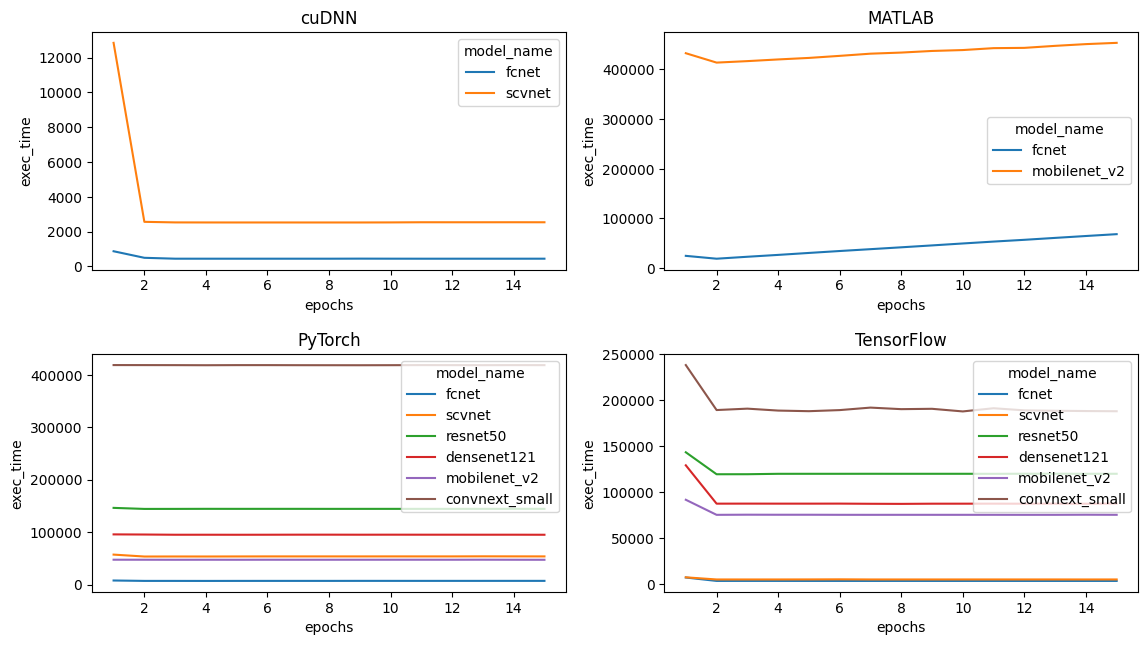

In [125]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(12,7)
fig.tight_layout(pad=4.0)

for ax, framework in zip(axes.flatten(), training.framework.unique()):
	sns.lineplot(data=training[training.framework == framework], x='epochs', y='exec_time', hue='model_name', ax=ax)
	ax.set_title(framework)

if GENERATE_PNGS:
	fig.savefig('./plots/all_frameworks_comparison.png')

# Porównanie wydajności między technologiami
* fcenet -> wszystko
* scvnet -> cudnn, pytorch, tensorflow
* mobilenet -> matlab, pytorch, tensorflow

* matlab vs reszta (fcnet i mobilenet)

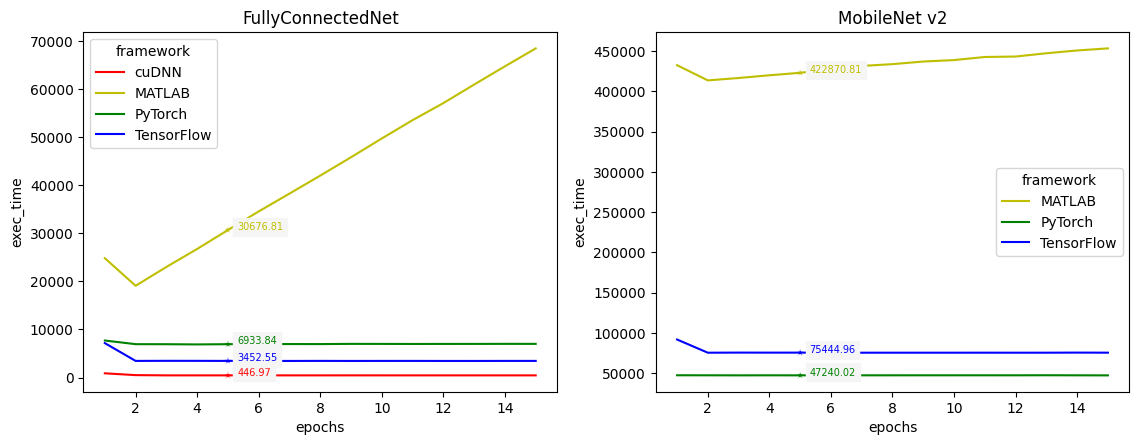

In [126]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12,5)
fig.tight_layout(pad=4.0)

def matlab_comparison_plots(ax, model_name, palette, ann_ep, title):
	sns.lineplot(
		data=training[training.model_name == model_name],
		x='epochs', y='exec_time', hue='framework',
		palette=palette, ax=ax
	)

	for y, c in zip(training[(training.model_name == model_name) & (training.epochs == ann_ep)].exec_time, palette):
		ax.text(ann_ep+0.3, y, f'{y:.2f}', color=c, backgroundcolor='whitesmoke', fontsize=7)

	sns.scatterplot(
		data=training[(training.model_name == model_name) & (training.epochs == ann_ep)],
		x='epochs', y='exec_time', hue='framework',
		ax=ax, palette=palette,
		legend=False, marker='*'
	)

	ax.set_title(title)

matlab_comparison_plots(axes[0], 'fcnet', ['r', 'y', 'g', 'b'], 5, 'FullyConnectedNet')
matlab_comparison_plots(axes[1], 'mobilenet_v2', ['y', 'g', 'b'], 5, 'MobileNet v2')

if GENERATE_PNGS:
	fig.savefig('./plots/matlab_comparison.png')

* cudnn vs python (fcnet i scvnet)

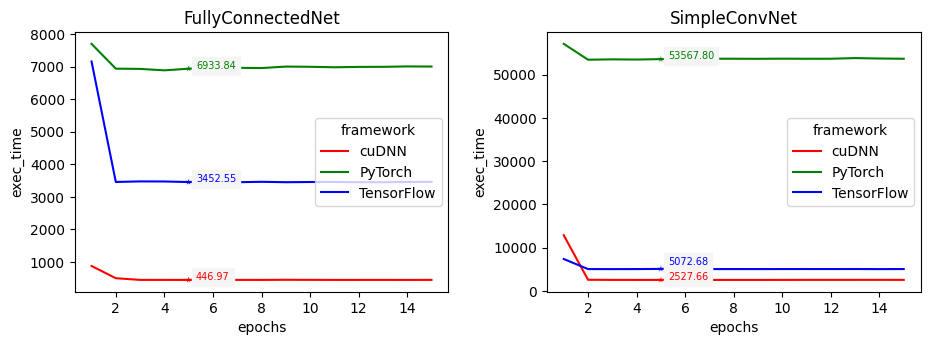

In [141]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,4)
fig.tight_layout(pad=4.0)

def cudnn_comparison_plots(model_name, ax, ann_ep, title):
	sns.lineplot(
		data=training[(training.model_name == model_name) & (training.framework != 'MATLAB')],
		x='epochs', y='exec_time', hue='framework', palette=['r', 'g', 'b'], ax=ax
	)

	sns.move_legend(ax, "center right")
	ax.set_title(title)

	points = training[(training.model_name == model_name) & 
										(training.epochs == ann_ep) &
										(training.framework != 'MATLAB')
	]

	for y, c in zip(points.exec_time, ['r', 'g', 'b']):
		ax.text(
			s=f'{y:.2f}', x=ann_ep+0.3,
			y=y+(1000 if (c == 'b' and model_name == 'scvnet') else 0),
	  	color=c, backgroundcolor='whitesmoke', 
			fontsize=7
		)

	sns.scatterplot(data=points, x='epochs', y='exec_time', hue='framework',
		ax=ax, legend=False, marker='*', palette=['r', 'g', 'b']
	)

cudnn_comparison_plots('fcnet', axes[0], 5, 'FullyConnectedNet')
cudnn_comparison_plots('scvnet', axes[1], 5, 'SimpleConvNet')

if GENERATE_PNGS:
	fig.savefig('./plots/cudnn_comparison.png')